In [54]:
print("--- Environment ---")
# GNU Octave, version 6.2.0

import sys, pkg_resources
print("Python: " + sys.version)

for package in pkg_resources.working_set:
    print(package.key.ljust(20), package.version)

--- Environment ---
Python: 3.8.8 (default, Feb 19 2021, 16:53:21) [GCC]
tornado              6.1
tensorflow           2.4.1
scipy                1.6.2
pyzmq                22.0.3
protobuf             3.15.8
pillow               8.2.0
numpy                1.19.5
matplotlib           3.4.1
kiwisolver           1.3.1
h5py                 2.10.0
grpcio               1.32.0
wrapt                1.12.1
wheel                0.36.2
werkzeug             1.0.1
wcwidth              0.2.5
urllib3              1.26.4
typing-extensions    3.7.4.3
traitlets            5.0.5
termcolor            1.1.0
tensorflow-estimator 2.4.0
tensorboard          2.5.0
tensorboard-plugin-wit 1.8.0
tensorboard-data-server 0.6.0
six                  1.15.0
setuptools           56.0.0
rsa                  4.7.2
requests             2.25.1
requests-oauthlib    1.3.0
python-dateutil      2.8.1
pyparsing            2.4.7
pygments             2.8.1
pyasn1               0.4.8
pyasn1-modules       0.2.8
ptyprocess          

In [55]:
import numpy as np
import matplotlib.pyplot as plt

Exemplo de um "gradient descent": Função qudratica

In [56]:
def gradient_descent(gradient, start, learn_rate, n_iter):
    vector = [start]
    for i in range(n_iter):
        diff = -learn_rate * gradient(vector[-1])
        vector.append(vector[-1] + diff)
    return vector


In [57]:
def f(x):
    return x**2 + 2*x + 100 

def f_1(x):
    return 2*x + 2

In [58]:
start = 10.0

x_visited = np.array(gradient_descent(gradient=f_1, start=start, learn_rate=0.1, n_iter=100))

In [59]:
x = np.linspace(-10, 10, 100)
y = f(x)

y_visited = f(np.array(x_visited))

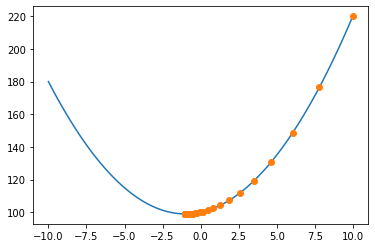

In [60]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x_visited, y_visited, "o")

In [61]:
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean()  # .mean() is a method of np.ndarray

In [62]:
def gradient_descent(
    gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * np.array(gradient(x, y, vector))
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

In [63]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

w = gradient_descent(ssr_gradient, x, y, start=[0.5, 0.5], learn_rate=0.0008, n_iter=100000)

In [64]:
# SGD para o caso de sistema linear sobredeterminado
# Dados iniciais colhidos da execução do código octave provido pelo professor.

X = np.array([[-1.224837,  -0.349136],
  [ 0.763838,   0.652205],
  [-0.419023,  -0.103952],
  [ 0.504619,  -0.113735],
  [ 0.577426,   0.472899],
  [ 0.540946,  -1.431614],
  [-0.602121,   0.665469],
  [-0.042490,  -0.073296],
  [ 0.183884,   0.757235],
  [-0.065878,  -0.766607]])

S = np.array([-1, -1, 1, 1, -1, 1, 1, -1, 1, -1])


In [65]:
def gradient_descent(gradient, x, y, b, learn_rate = 0.1, n_iter = 50, tolerance = 1e-06):
    for _ in range(n_iter):
        diff = -learn_rate * np.array(gradient(x, y, b[-1]))
        if np.all(np.abs(diff) <= tolerance):
            break
        b.append(b[-1] + diff)
    return b

In [66]:
# w = (X'*X)\X'*S;
w_1 = np.matmul(np.transpose(X), X)
w_2 = np.matmul(np.transpose(X), S)
w,resid,rank,s = np.linalg.lstsq(w_1, w_2, rcond=None)

In [67]:
# (X'*X*w1(:,it-1)-X'*S);
def sub_gradient(x, y, b):
    return  np.matmul(np.matmul(np.transpose(x), x), b) - np.matmul(np.transpose(x), y)

In [68]:
b = [np.array([0,0])]
aprox_w = gradient_descent(sub_gradient, X, S, b=b, learn_rate=0.1, n_iter=50)

Solução ótima:       [ 0.05877163 -0.03920086]
Solução aproximada:  [ 0.05876955 -0.0392004 ]
Número de iterações:  25  (tolerancia 1e-06)


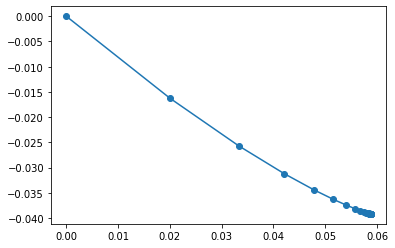

In [75]:

x_plot = []
y_plot = []

for aux in aprox_w:
    x_plot.append(aux[0])
    y_plot.append(aux[1])

fig, ax = plt.subplots()
ax.plot(x_plot, y_plot, "-o")

print("Solução ótima: ".ljust(20), w)
print("Solução aproximada: ",  aprox_w[-1])
print("Número de iterações: ",  len(aprox_w), " (tolerancia 1e-06)")

In [26]:
from math import sqrt

def adam(gradient, x, y, b, alpha, beta1, beta2 , m, v, n_iter = 50, tolerance = 1e-06):
    for t in range(n_iter):
        g = np.array(gradient(x, y, b[-1]))
        m = beta1 * m + (1.0 - beta1) * g
        v = beta2 * v + (1.0 - beta2) * g**2
        mhat = m / (1.0 - beta1**(t+1))
        vhat = v / (1.0 - beta2**(t+1))
        diff = - alpha * mhat / (np.sqrt(vhat) + 1e-8)
        new_b = b[-1] + diff
        if np.all(np.abs(diff) <= tolerance):
            break
        b.append(new_b)
    return b

In [76]:
# ADAM para o caso de sistema linear sobredeterminado
# Dados iniciais colhidos da execução do código octave provido pelo professor.

b = [np.array([0,0])]
alpha = 0.02
beta1 = 0.01
beta2 = 0.9999
m = 0
v = 0

aprox_w = adam(sub_gradient, X, S, b, alpha, beta1, beta2, m, v)

Solução ótima:       [ 0.05877163 -0.03920086]
Solução aproximada:  [ 0.05877119 -0.0392008 ]
Número de iterações:  11  (tolerancia 1e-06)


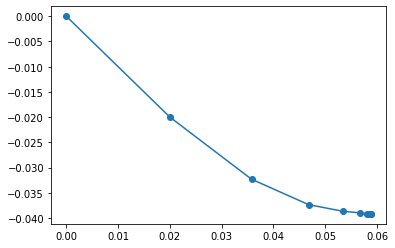

In [77]:
x_plot = []
y_plot = []

for aux in aprox_w:
    x_plot.append(aux[0])
    y_plot.append(aux[1])

fig, ax = plt.subplots()
ax.plot(x_plot, y_plot, "-o")

print("Solução ótima: ".ljust(20), w)
print("Solução aproximada: ",  aprox_w[-1])
print("Número de iterações: ",  len(aprox_w), " (tolerancia 1e-06)")

In [88]:
# SGD para o caso de sistema linear sobredeterminado
# Dados iniciais colhidos da execução do código octave provido pelo professor.

X = [[ -1.2248e+00, -3.4914e-01, -1.8727e-01,  1.0676e-01, -1.0350e+00, -4.3585e-02,  3.9416e-01,  3.0408e-01,  1.1276e-01,  5.1416e-01, -1.0642e-01, -1.6706e+00, -1.8195e+00, -7.9287e-01, -7.3091e-01,  1.0634e-02, -3.4365e-01, -1.5580e-01, -6.7501e-01,  8.2637e-01],
    [  7.6384e-01,  6.5221e-01, -7.7608e-01,  1.8862e+00, -1.0198e+00,  3.4212e-01, -1.0393e-01, -1.7650e+00, -5.3055e-01,  8.5083e-01,  1.4618e+00, -4.2876e-01, -5.7920e-02, -1.5734e+00,  6.3825e-01, -1.3371e+00,  6.7073e-01, -1.0039e+00,  4.7874e-01, -6.8370e-01],
    [ -4.1902e-01, -1.0395e-01,  5.3210e-01, -1.8668e+00,  2.1918e-01, -8.0915e-02,  1.2037e+00,  2.3749e+00, -2.1097e+00, -5.2516e-01, -1.0096e+00,  1.7034e+00, -2.7636e-01,  4.4260e-01,  2.4808e-01, -3.5481e-01, -1.4040e+00, -5.4513e-01, -1.3504e+00, -1.2562e+00],
    [  5.0462e-01, -1.1373e-01,  8.5450e-02,  1.1949e+00,  1.5526e+00,  1.4771e-01,  7.6859e-01, -3.1491e-01,  8.1286e-01,  1.0671e+00,  6.9118e-01,  1.1345e+00, -1.7412e+00, -7.4511e-01, -6.7894e-01, -5.8967e-02,  4.0029e-01, -7.3612e-01, -6.1429e-01,  1.5477e-01],
    [  5.7743e-01,  4.7290e-01, -2.3120e-01,  1.2053e+00,  1.3123e+00,  2.3900e+00, -5.9375e-01,  1.4920e+00, -4.8764e-01, -4.5824e-02,  4.7791e-01,  1.2149e+00,  2.4387e-01,  3.3956e-01,  2.3134e+00, -1.5237e-01, -1.9267e-01, -1.6356e+00, -4.4867e-01,  1.2490e+00],
    [  5.4095e-01, -1.4316e+00,  8.7054e-01,  6.3232e-01,  1.3999e+00, -3.3606e-02, -1.2876e+00,  1.6150e-02, -5.4677e-01,  5.4193e-02, -5.0678e-01,  5.7130e-02,  2.4413e+00,  1.1461e+00,  1.3945e+00, -1.6609e-01, -6.0439e-01,  1.2716e-01, -1.8169e+00, -4.1846e-02],
    [ -6.0212e-01,  6.6547e-01,  9.5674e-01,  3.7200e-01,  6.8383e-02, -1.0836e+00, -1.6549e-01,  4.5254e-01, -1.0162e-01,  8.9249e-01, -5.7173e-01,  8.9897e-03,  1.3085e+00, -5.0086e-01,  7.5543e-01, -4.8755e-01,  1.2799e+00,  7.8700e-01, -8.2406e-01, -9.6027e-01],
    [ -4.2490e-02, -7.3296e-02, -1.0265e+00, -3.7928e-01, -2.2110e-02, -1.7861e-01, -1.4509e+00, -3.9868e-01, -7.7386e-01,  2.1226e-01, -3.9961e-01, -9.3100e-01, -6.5567e-01,  3.5168e-01,  1.5111e-01, -1.2447e+00, -2.0945e+00, -3.1721e-01, -1.7323e+00, -1.1466e+00],
    [  1.8388e-01,  7.5723e-01,  9.1150e-01,  7.8457e-01, -9.3897e-01, -1.6182e+00,  1.8010e+00,  7.6670e-01,  2.6246e-01,  1.3212e-01,  2.8234e+00, -1.0111e+00,  2.1009e+00,  1.2564e+00,  1.7879e+00, -1.3155e+00,  8.6342e-01,  5.1377e-01, -4.1233e-01,  1.3788e+00],
    [ -6.5878e-02, -7.6661e-01, -1.8788e+00, -2.9837e-01,  2.3306e+00,  7.4484e-01,  3.8321e-01,  2.9173e-01,  1.7613e-01,  3.2426e-01,  3.7534e-02,  2.0396e+00, -2.2252e-01,  2.0880e-01, -9.6805e-01, -1.4961e+00,  1.1413e+00, -7.6496e-01,  1.7237e+00,  1.7902e-01]]

S = [1, -1, -1, -1, 1, -1, 1, -1, 1, -1]

X =  np.array(X)
S = np.array(S)


In [89]:
# # w = (X'/(X*X'))*S;
w_1 = np.transpose(X)
w_2 = np.matmul(X, np.transpose(X))
w_3 = np.transpose(np.matmul(np.linalg.inv(np.transpose(w_2)),  np.transpose(w_1)))
w = np.matmul(w_3, S)

In [292]:
b = [np.zeros(20)]
aprox_w = gradient_descent(sub_gradient, X, S, b=b, learn_rate=0.043, n_iter=5000, tolerance = 1e-06)

Solução ótima     Solução aproximada
  -0.39589             -0.39589.
  0.50159             0.50158.
  -0.00653             -0.00652.
  -0.02344             -0.02344.
  -0.11574             -0.11574.
  0.12387             0.12387.
  -0.22529             -0.22528.
  0.45587             0.45587.
  0.29891             0.29890.
  0.05896             0.05896.
  -0.17005             -0.17005.
  -0.27595             -0.27595.
  -0.05985             -0.05985.
  -0.00177             -0.00177.
  0.28168             0.28167.
  0.10917             0.10917.
  0.29021             0.29022.
  0.18247             0.18247.
  0.08241             0.08241.
  0.31752             0.31753.
Número de iterações:  112  (tolerancia 1e-06)


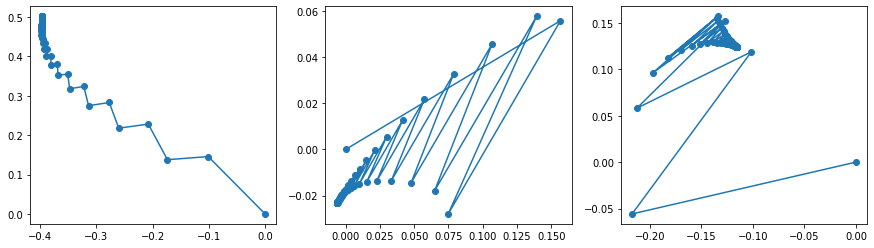

In [293]:
x_plot = []
y_plot = []

x1_plot = []
y1_plot = []

x2_plot = []
y2_plot = []

for aux in aprox_w:
    x_plot.append(aux[0])
    y_plot.append(aux[1])
    x1_plot.append(aux[2])
    y1_plot.append(aux[3])
    x2_plot.append(aux[4])
    y2_plot.append(aux[5])

fig, axs = plt.subplots(1, 3)
fig.set_figwidth(15)

axs[0].plot(x_plot, y_plot, "-o")
axs[1].plot(x1_plot, y1_plot, "-o")
axs[2].plot(x2_plot, y2_plot, "-o")

print("Solução ótima     Solução aproximada")
for a, b in zip(w, aprox_w[-1]):
    print("  {:.5f}             {:.5f}.".format(a, b))
print("Número de iterações: ",  len(aprox_w), " (tolerancia 1e-06)")

In [294]:
b = [np.zeros(20)]
alpha = 0.05
beta1 = 0.75
beta2 = 0.999999999
m = 0
v = 0

aprox_w = adam(sub_gradient, X, S, b, alpha, beta1, beta2, m, v, 500, tolerance = 1e-06)

Solução ótima     Solução aproximada
  -0.39589             -0.46262.
  0.50159             0.45519.
  -0.00653             0.00123.
  -0.02344             -0.03506.
  -0.11574             -0.12532.
  0.12387             0.14935.
  -0.22529             -0.21735.
  0.45587             0.44520.
  0.29891             0.33432.
  0.05896             0.11561.
  -0.17005             -0.12692.
  -0.27595             -0.25709.
  -0.05985             -0.06951.
  -0.00177             0.01620.
  0.28168             0.33977.
  0.10917             0.13540.
  0.29021             0.25357.
  0.18247             0.20031.
  0.08241             0.12008.
  0.31752             0.26129.
Número de iterações:  89  (tolerancia 1e-03)


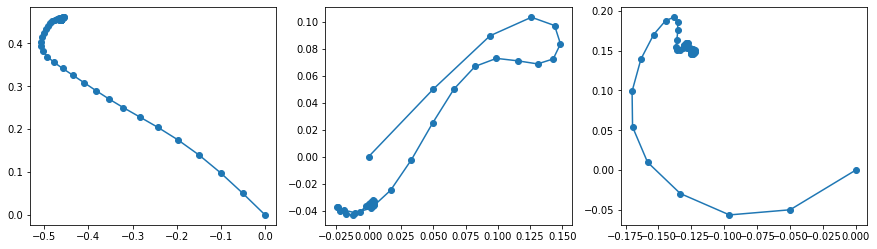

In [295]:
x_plot = []
y_plot = []

x1_plot = []
y1_plot = []

x2_plot = []
y2_plot = []

for aux in aprox_w:
    x_plot.append(aux[0])
    y_plot.append(aux[1])
    x1_plot.append(aux[2])
    y1_plot.append(aux[3])
    x2_plot.append(aux[4])
    y2_plot.append(aux[5])

fig, axs = plt.subplots(1, 3)
fig.set_figwidth(15)

axs[0].plot(x_plot, y_plot, "-o")
axs[1].plot(x1_plot, y1_plot, "-o")
axs[2].plot(x2_plot, y2_plot, "-o")

print("Solução ótima     Solução aproximada")
for a, b in zip(w, aprox_w[-1]):
    print("  {:.5f}             {:.5f}.".format(a, b))
print("Número de iterações: ",  len(aprox_w), " (tolerancia 1e-03)")